<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Classification non supervisée avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>
# Représentations des classes dans le [MDS](http://wikistat.fr/pdf/st-m-explo-mds.pdf), l'[ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf) ou l'[AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)
#### Résumé 
[Classification non supervisée](http://wikistat.fr/pdf/st-m-explo-class.pdf) (CAH, *kmeans*, *pam*) et représentation des classes dans un plan factoriel avec des données sous différentes formes: tableau de distance et [MDS](http://wikistat.fr/pdf/st-m-explo-mds.pdf), variables quantitatives et [ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), variables qualitatives et [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf). Application à des exemples élémentaires.

## 1 Introduction
Le nombre de méthodes de classification non supervisée (*clustering*) et le nombre d'options dans chacune d'elles conduisent à une combinatoire de possibilités assez impressionnante. Le but est de mettre en évidence, de façon heuristique et dans des cas simples, quels sont les paramètres qui influencent, de visu, les classes obtenues. Un rôle important est donc attribué à la représentation des classes dans un plan factoriel. Le choix de la méthode: [analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [analyse factorielle multiple des correspondances](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)  ou encore [positionnement multidimensionnel](http://wikistat.fr/pdf/st-m-explo-mds.pdf), dépend du type (quantitatives, qualitatives, distances) des données analysées.

La plupart des analyses ci-dessous peuvent être reproduites avec SAS mais de façon nettement moins souple et pas toutes (PAM n'est pas implémenté). 

## 2 Positionnement multidimensionnelle ou *MDS*
### 2.1 Objectif
le *MultiDimensional Scaling, MDS* ou encore *ACP d'un tableau de distances* s'applique à des données archivées sous la forme d'une matrice ($n\times n$) de distances ou dissimilarités. Cet algorithme est appliqué sur un exemple simple comparant des distances entre villes. 

Les données se présentent donc sous la forme du triangle inférieur d'une matrice symétrique, par construction, et contenant les distances kilométriques routières, donc non-euclidiennes, de 47 villes française ou proches prises 2 à 2 (Source : carte IGN). 

### 2.2 Lecture des données sous la forme d'une matrice triangulaire
La lecture d'une matrice triangulaire inférieure en tant que matrice de distance pose quelques difficultés dans R dans la gestion du type des objets. Ceci nécessite une séquence de commandes pour la bonne mise en forme.

In [4]:
mdsville=read.table("Data/mdsville.dat",fill=TRUE)
# extraction des noms des villes
villes=as.character(mdsville[2:48,1])
# extraction des valeurs des distances
m=mdsville[2:48,2:48]
# transformation en une matrice alphanumérique
m=as.matrix(m)
# retour au numérique avec données manquantes
m=as.numeric(m)
# reformattage en une matrice
m=matrix(m,47,47)
# adjonction des noms des villes en ligne et colonne
dimnames(m)[[1]]=villes
dimnames(m)[[2]]=villes
# transformation en un objet de type distance
d=as.dist(m,diag=TRUE)

### 2.3 MDS des villes
En revanche, le MDS est immédiat. On remarque que le choix de la dimension, ici $k=2$ est à traiter comme en ACP. Une visite du manuel permettrait de voir comment calculer toutes les valeurs singulières afin d'aider ce choix par leur représentation.

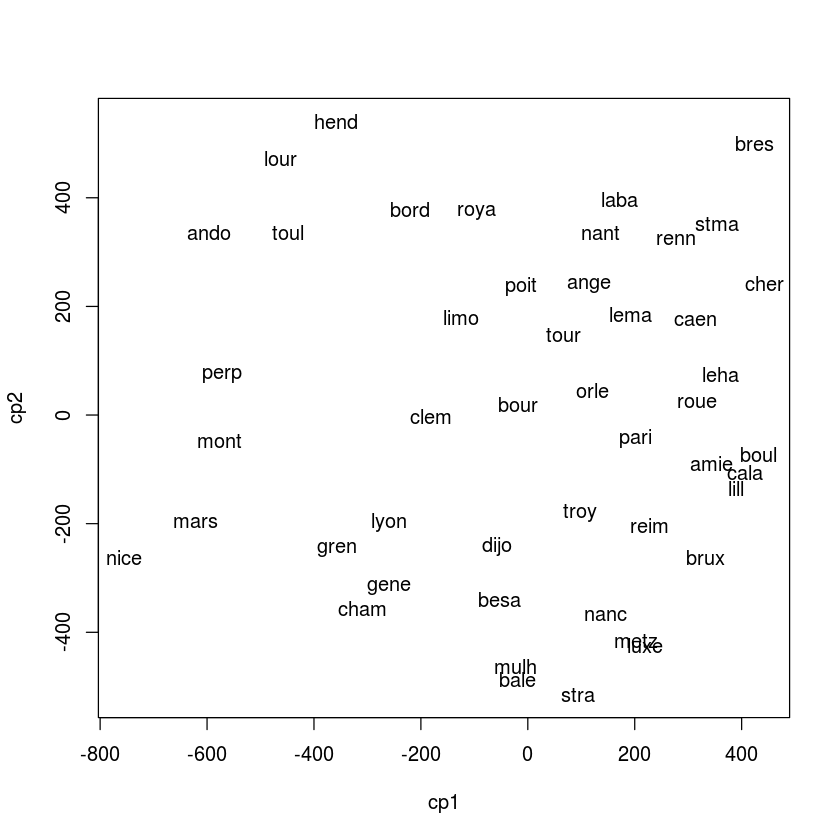

In [5]:
mds = cmdscale(d, k=2)
plot(mds, type="n", xlab="cp1", ylab="cp2")
text(mds,villes)


**Q** Commenter la représentation obtenue par rapport à la carte géographique.

## 3 Classification à partir d'un tableau de distances

Les mêmes données sont reprises en vue de regrouper les villes en classes homogènes au regard de leurs distances respectives.

### 3.1 CAH et représentation par MDS
**Q** Quel est le graphe ci-dessous? Commenter.

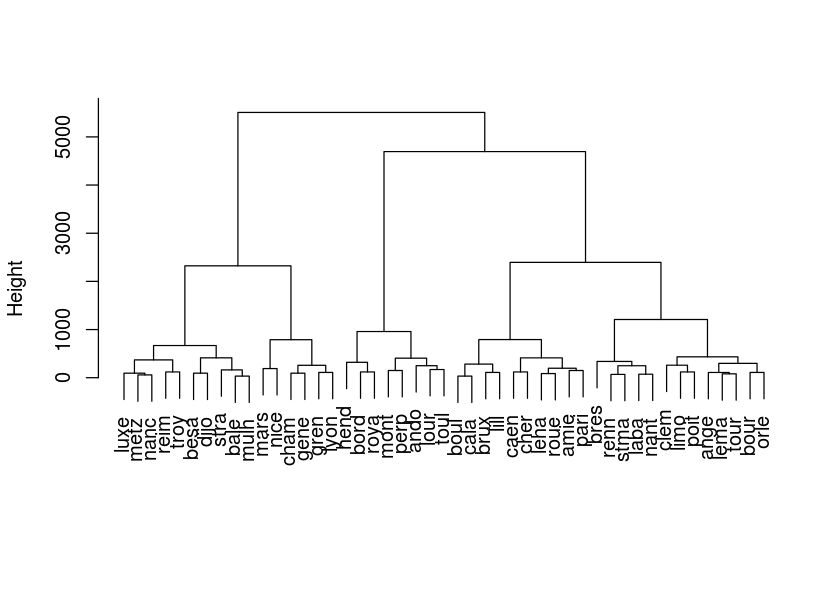

In [29]:
chv = hclust(d, method="ward.D")
options(repr.plot.width=7, repr.plot.height=5)
plot(chv,main=NULL,sub="",xlab="")

**Q** Comment est définie la corrélation cophénétique? 

In [30]:
# cophenetic correlation 
cor(cophenetic(chv),d)

[1] 0.6176496

**Q** Quel est le graphe ci-dessous? Quelle décision en tirer?

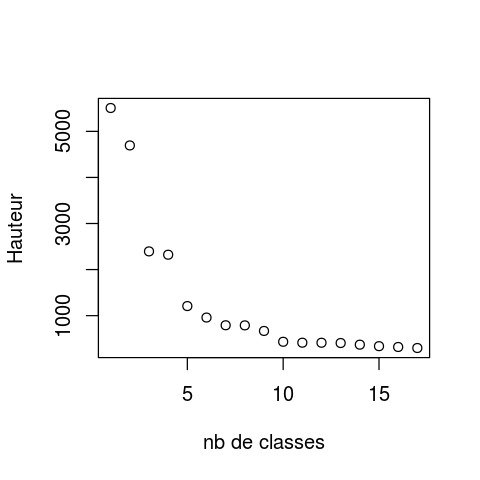

In [31]:
options(repr.plot.width=4, repr.plot.height=4)
plot(chv$height[46:30],xlab="nb de classes",ylab="Hauteur")

**Q** Quel est le graphe ci-dessous? Commentaire.

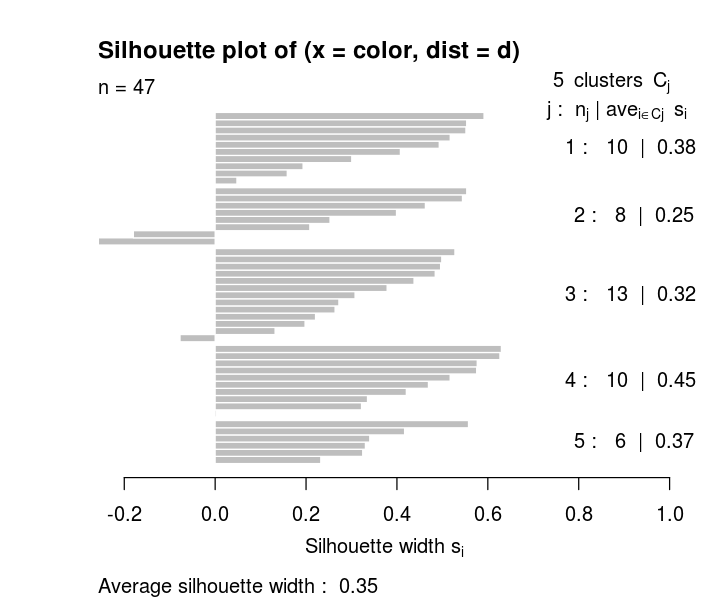

In [32]:
color=cutree(chv,k=5)
library(cluster)
options(repr.plot.width=6, repr.plot.height=5)
plot(silhouette(color,d))

Il est possible de calculer puis représenter la silhouette moyenne pour plusieurs valeurs du nombre de classes et tenter de minimiser cette valeur; cette stratégie conduisant à un choix ``trivial'' $(k=3)$ est laissée de côté.

Les données provenant d'une matrice de distances, le MDS s'impose pour une représentation fatorielle des villes.

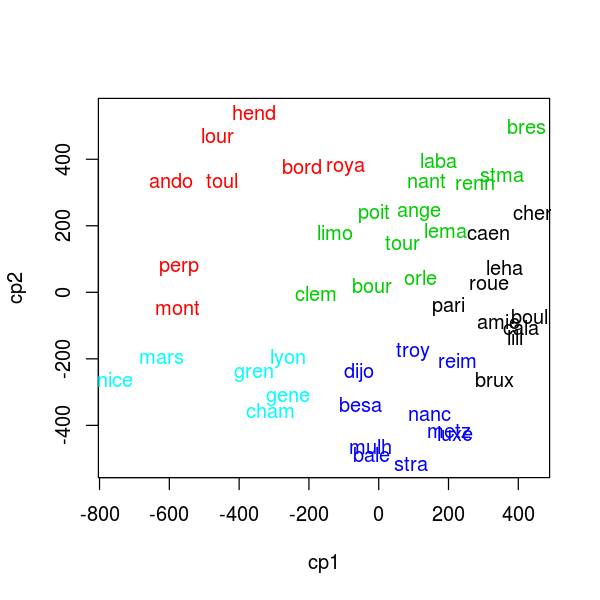

In [33]:
options(repr.plot.width=5, repr.plot.height=5)
plot(mds, type="n", xlab="cp1", ylab="cp2")
# représentation avec des couleurs
text(mds,villes,col=color)  

Influence déterminante du choix de la distance entre groupe.

**Q** Quelles sont les options possibles de l'option `method` de la fonction `hclust`?

**Q** Que signifie le choix `single` ci-dessous?

In [34]:
chv <- hclust(d, method="single")
cor(cophenetic(chv),d)

[1] 0.6393692

**Q** Que devient la corrélation cophénétique?

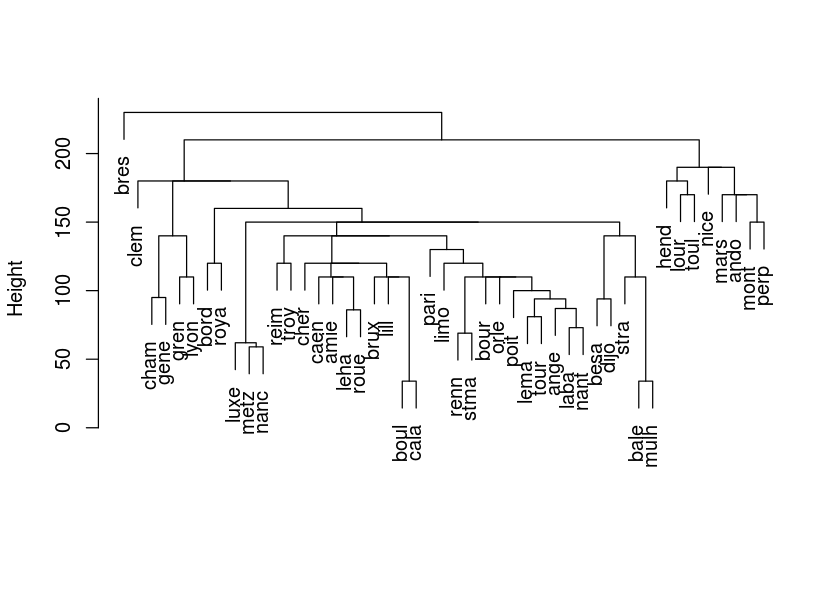

In [35]:
options(repr.plot.width=7, repr.plot.height=5)
plot(chv,main=NULL,sub="",xlab="")

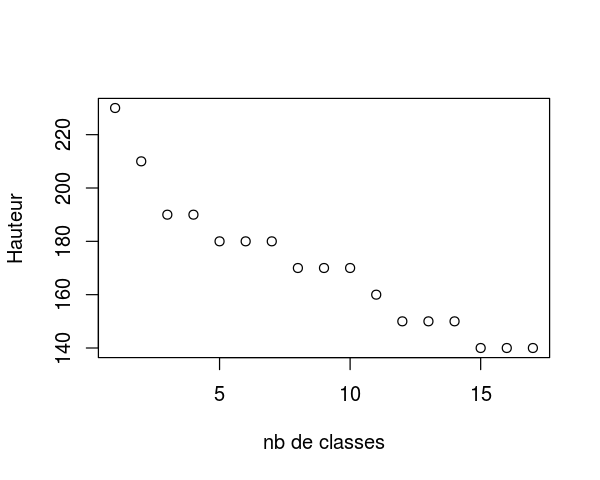

In [36]:
options(repr.plot.width=5, repr.plot.height=4)
plot(chv$height[46:30],xlab="nb de classes",ylab="Hauteur")

**Q** Le choix du nombre de classes est-il facile?

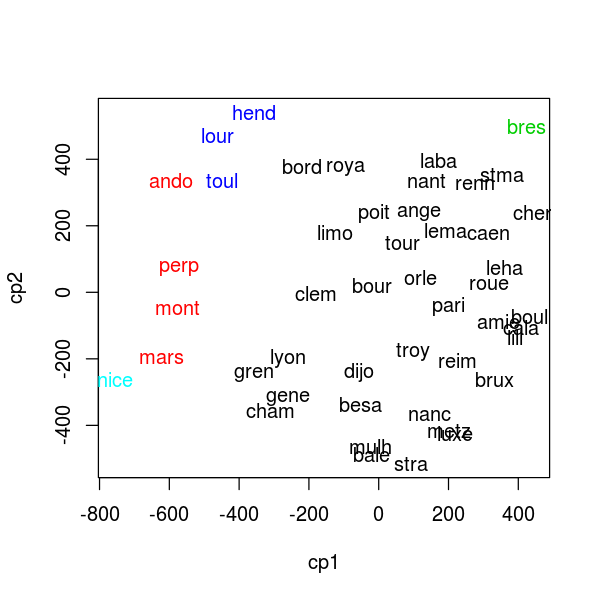

In [37]:
color=cutree(chv,k=5)
options(repr.plot.width=5, repr.plot.height=5)
plot(mds, type="n", xlab="cp1", ylab="cp2")
text(mds,villes,col=color) # représentation avec des couleurs 

Tester les autres options de distances entre groupes. 

**Q** Conclusion: le critère de plus grande corrélation cophénétique est-il à considérer pour choisir l'option de distance entre les groupes?

### 3.2 PAM et représentation par MDS
L'algorithme de réallocation k-means n'est pas adapté à une matrice de distances ou de dissimilarités; en revanche, PAM (partition around medoïds) est opérationnel si le nombre d'observations n'est pas trop important; sinon utiliser l'adaptation {\tt clara}. Ces fonctions sont disponibles dans la librairie `cluster`.

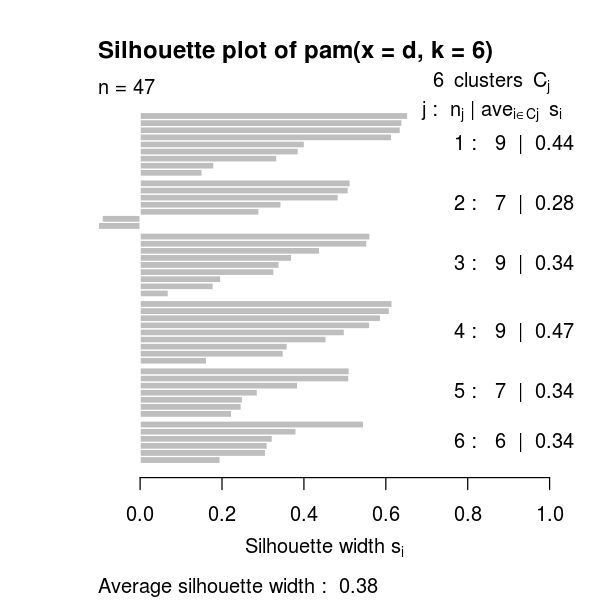

In [38]:
library(cluster)
# faire varier le nombre de classes
plot(silhouette(pam(d,6)))

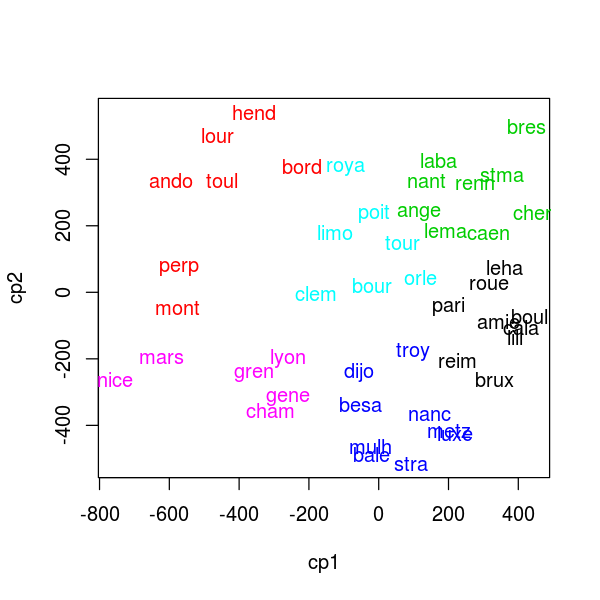

In [39]:
pamv=pam(d,6)
color=pamv$clustering
plot(mds, type="n", xlab="cp1", ylab="cp2")
# représentation avec des couleurs
text(mds,villes,col=color)  

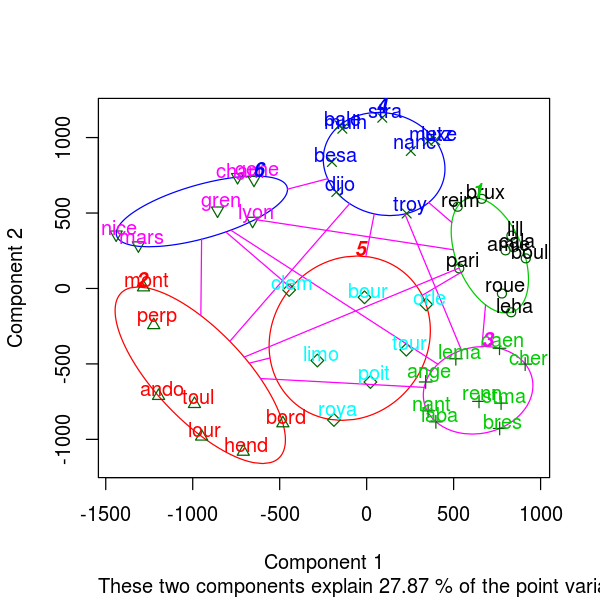

In [40]:
# le même avec des ellipses
clusplot(d,pamv$clustering,diss=TRUE,labels=2,color=TRUE,col.txt=pamv$clustering,main="")

*Remarque*: le critère de `clusGap` pour la sélection du nombre de classe ne s'applique pas à une matrice de distances mais il pourrait s'appliquer aux coordonnées principales issues du MDS.

## 4 Classification de données quantitatives
### 4.1 Données OCDE
Les données du fichier `ocdeR.dat` sont celles étudiées comme exemple d'[ACP cubique](http://wikistat.fr/pdf/st-m-explo-acp.pdf) avec SAS. Comme elles sont connues par une représentation euclidienne, la distance considérée par défaut est euclidienne mais d'autres choix sont possibles (manhattan ou valeurs absolues...). 


### 4.2 CAH et représentation par ACP
Lecture des données puis construction de la matrice de distance.

**Attention** Il est important de centrer réduire des variables quantitatives avant de faire une classification

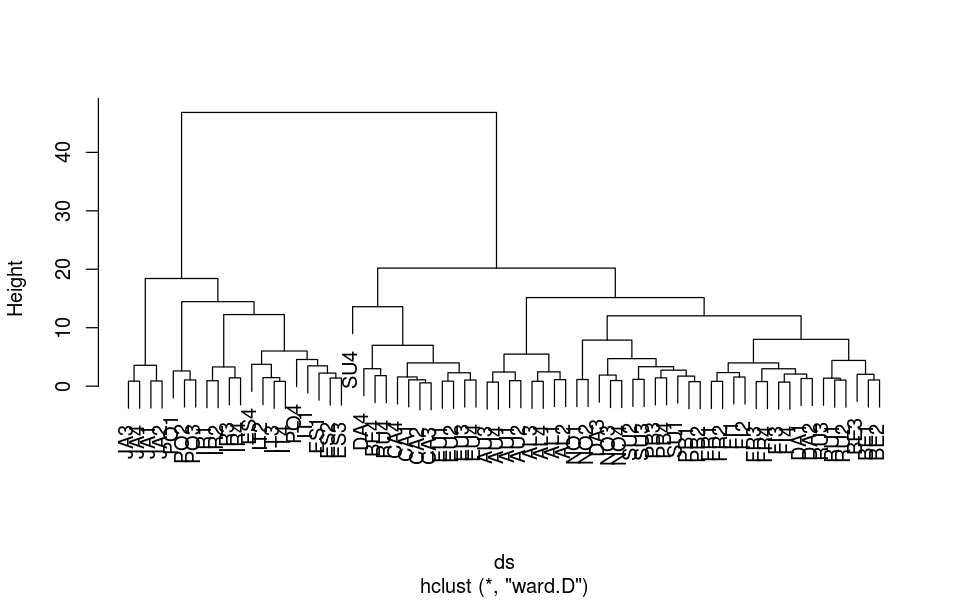

In [41]:
ocde=read.table("Data/ocdeR.dat")
ds=dist(scale(ocde))
# classification hiérarchique
hc.ds = hclust(ds,method="ward.D")
options(repr.plot.width=8, repr.plot.height=5)
plot(hc.ds,main="")  # dendogramme

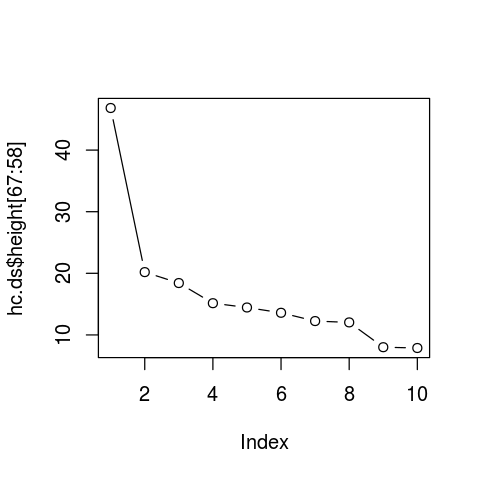

In [42]:
# choix du nombre de classes
options(repr.plot.width=4, repr.plot.height=4)
plot(hc.ds$height[67 :58],type="b")

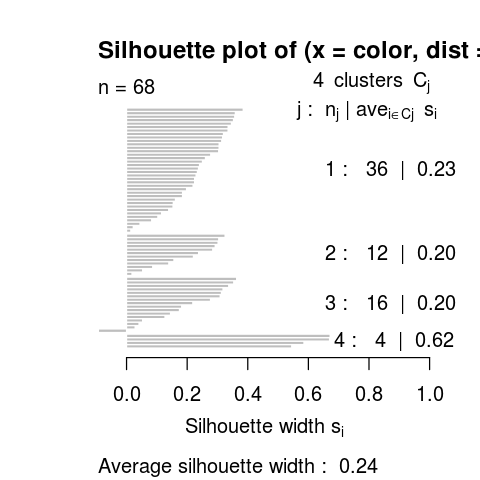

In [43]:
color= cutree(hc.ds,k=4) # couleurs des classes
# silhouette
library(cluster)
plot(silhouette(color,ds))

In [44]:
# corrélation cophénétique
cor(cophenetic(hc.ds),ds)

[1] 0.5808663

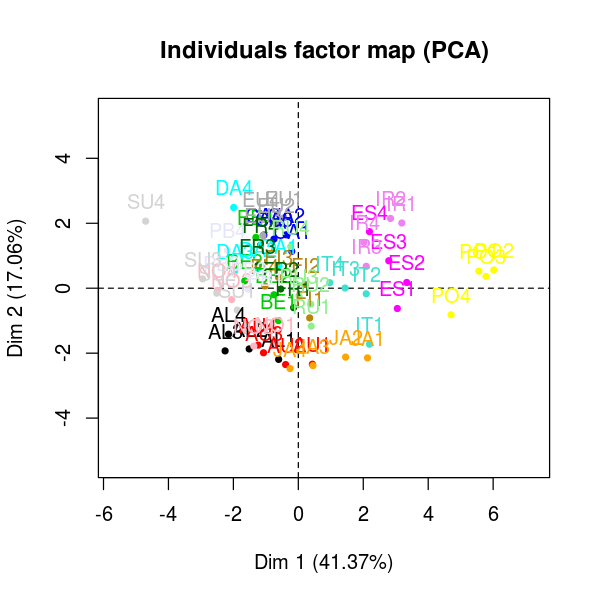

In [45]:
# acp pour représentations
library(FactoMineR)
acp=PCA(ocde,ncp=13,graph=F) 
# graphe de l'acp
options(repr.plot.width=5, repr.plot.height=5)
plot(acp,choix="ind", habillage="ind",col.hab=rep(1:17, c(rep(4,17))))

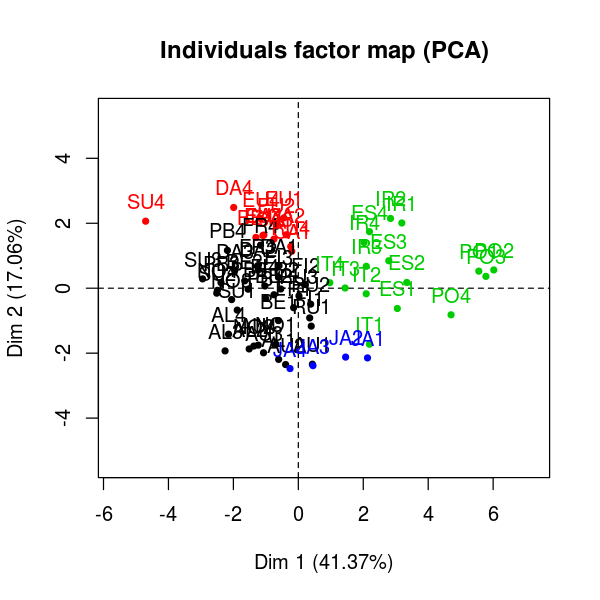

In [46]:
# graphe de l'acp avec les couleurs des classes de la cah
plot(acp,choix="ind", habillage="ind",col.hab=color)

Refaire tourner l'algorithme en retirant la réduction des variables (fonction scale), même chose en remplaçant `method="ward.D"` par `method="single"`.

**Q** Noter l'importance de la normalisation des variables.

**Q** Que choisir comme méthode?

### 4.3 Algorithme de ré-allocation et représentation par ACP
Les données étant quantitatives, k-means est opérationnel. 

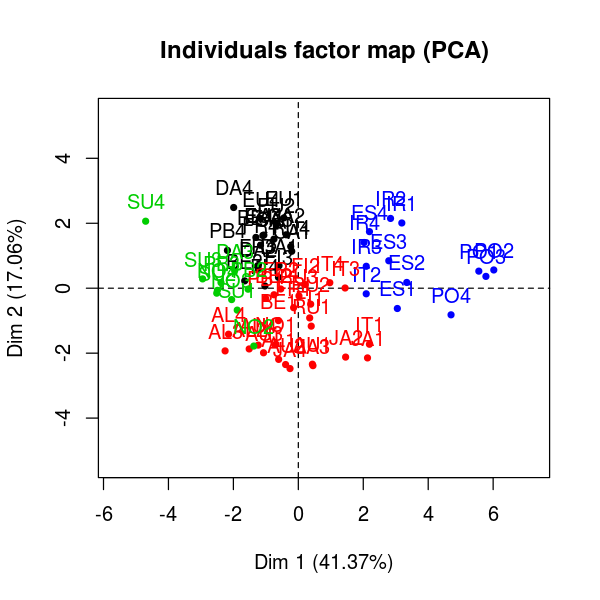

In [47]:
# version avec réduction
#  choix de 4 classes suggérées par la cah
kocde=kmeans(scale(ocde),4) 
color=kocde$cluster
plot(acp,choix="ind", habillage="ind",col.hab=color)

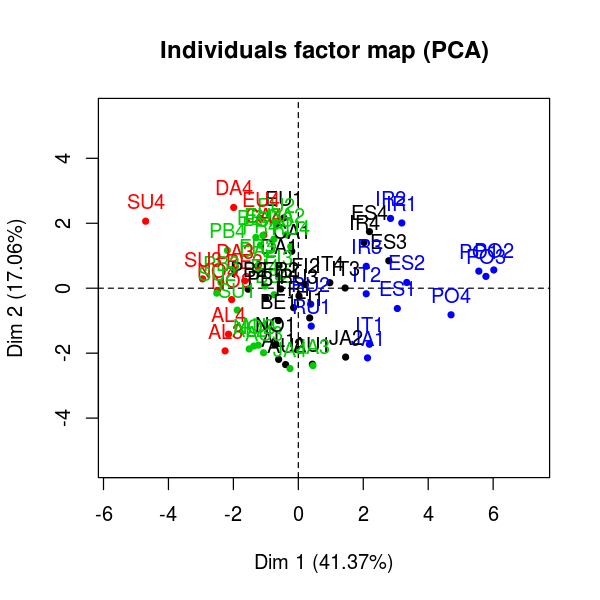

In [48]:
# version sans réduction
kocde=kmeans(ocde,4) 
color=kocde$cluster
plot(acp,choix="ind", habillage="ind",col.hab=color)

In [49]:
# utilisation de clusGap
library(cluster)
clusGap(ocde, FUN = kmeans, K.max = 8, B = 60)

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = ocde, FUNcluster = kmeans, K.max = 8, B = 60)
B=60 simulated reference sets, k = 1..8; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstSEmax', SE.factor=1): 5
          logW   E.logW       gap     SE.sim
[1,] 11.055642 11.30467 0.2490257 0.04491294
[2,] 10.470209 10.82669 0.3564794 0.03962272
[3,] 10.161772 10.61650 0.4547279 0.04634081
[4,]  9.852324 10.46427 0.6119432 0.04596482
[5,]  9.669627 10.34235 0.6727249 0.04680178
[6,]  9.602959 10.22614 0.6231833 0.04514223
[7,]  9.388815 10.11180 0.7229829 0.05143799
[8,]  9.513387 10.02137 0.5079856 0.05093506

Plusieurs critères sont concurrents pour sélectionner un $k$ optimal une fois les calculs de `clusGap` réalisés par *bootsrap*. le choix reste complexe.

### 4.4 Classification sur composantes principales
Dans des situaitons de très grande dimension, il peut être intéressant de réduire celle-ci par ACP avant d'opérer une classification. 

La librairie `FactoMineR` propose cette possibilité avec la production de graphiques élaborées mais sans doute pas tous utiles et qui bloquent jupyter. Un autre paramètre est susceptible d'avoir un impact, le nombre `ncp` de composantes retenues. 

In [50]:
acp=PCA(ocde,ncp=5,graph=F)
res.hcpc=HCPC(acp,graph=F,nb.clust=4)

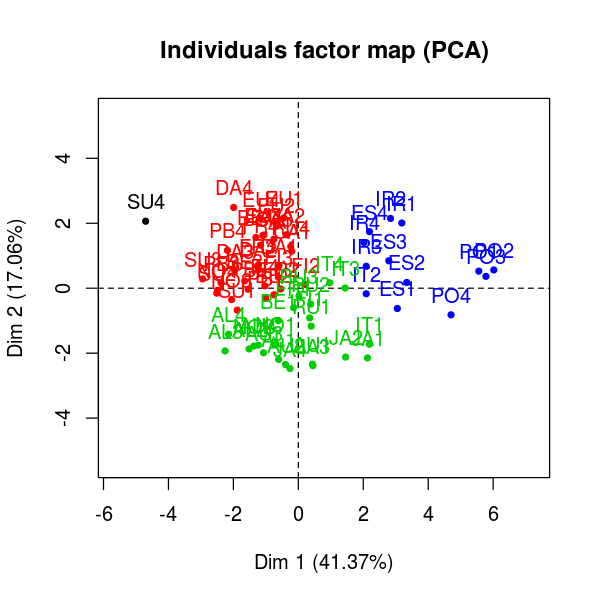

In [51]:
plot(acp, choix="ind", habillage="ind",col.hab=res.hcpc$data.clust$clust)

**Q** Que dire du choix de 4 classes? Revenir à 3.

**Q** Quelle option de classification vous semble la plus pertinente sur ces données OCDE?

## 5 Classification de données qualitatives
Plusieurs stratégies sont proposées pour classées des données qualitatives ou mélange de variables quantitatives et qualitatives. La plus simple consiste à recoder les variables quantitatives en qualitatives puis de calculer des scores à l'aide des composantes d'une [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf).
### 5.1 Données décrivant les races de chien

Les données (race des chiens) sont celles illustrant l'utilisation de l'AFCM; R est nettement plus souple que SAS pour enchaîner de telles analyses.

In [52]:
chiens=read.csv("chiens.Data/csv",row.names=1)
summary(chiens)

Warning message in file(file, "rt"):
“impossible d'ouvrir le fichier 'chiens.Data/csv' : Aucun fichier ou dossier de ce type”

ERROR: Error in file(file, "rt"): impossible d'ouvrir la connexion


### 5.2 CAH sur composantes de l'AFCM
Nous reprenons l'AFCM sur tableau disjonctif complet fournissant des scores ou variables quantitatives sur les individus, ici les races de chiens, il est alors facile de les classer. L'enchaînement par une CAH est la combinaison la plus simple à réaliser à l'aide de la librairie `FactoMineR`. Attention néanmoins de bien contrôler les options qui toutes sont prises par défaut. 

In [ ]:
library(FactoMineR)
#afcm avec la fonction en supplémentaire
afcm=MCA(chiens,quali.sup=7,graph=F)
plot(afcm, choix="ind",habillage="quali")

`FactoMineR`propose des aides à l'interprétation des classees. La variable classe est croisée 
avec chacune des variables. Un test du chi2 apprécie la liaison.

In [ ]:
res.hcpc=HCPC(afcm, graph=FALSE,order=FALSE,nb.clust=4)
res.hcpc$desc.var$test.chi2

Avant de mettre en évidence les modalités les plus "présentes" dans chaque classe.

In [ ]:
res.hcpc$desc.var$category

Justification a posteriori du choix du nombre de classes. Le choix par défaut (10) n'a pas d'intérêt.

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
plot(res.hcpc,choice="tree")

In [ ]:
plot(afcm, choix="ind", invisible="var",col.ind=res.hcpc$data.clust$clust)

In [ ]:
table(res.hcpc$data.clust$clust,res.hcpc$data.clust$fonction)

D'autres outils (arbre de discrimination) s'avéreront plus explicites pour interpréter les classes.

**Q** Combien de dimensions sont retenues par défaut dans cette AFCM? 

**Q** Quelle distance est prise en compte entre les individus?

**Q** Quelle est l'option par défaut pour la distance entre les groupes?

D'autre par une option positionnée (`consol=TRUE`) fait enchaîner automatiquement un algorithme *k-means*.

**Q** Que dire des options suivantes .

In [ ]:
afcm=MCA(chiens,quali.sup=7, ncp=10, graph=F)
res.hcpc=HCPC(afcm,method="single",graph=F,nb.clust=4)
table(res.hcpc$data.clust$clust,res.hcpc$data.clust$fonction)

En fait les classes se distinguent assez facilement et restent stables sur ces données sauf en cas d'utilisation du saut minimum.

Bien entendu, la fonction `HCPC` de `FactoMineR` pourrait être remplacée par tout autre algorithme de classification avec ses propres options: `hclust, kmeans, pam...`.